In [258]:
import streamlit as st

# 5 companies use A/B testing and for what use-case

# 5 companies that provide tools for A/B testing.

### AB Tasty
AB Tasty offers 
1. A/B testing
2. split testing
3. multivariate testing
4. funnel testing capabilities.

Using AB Tasty’s visual editor, you are able to quickly put together variants and tests and receive real-time reports with confidence levels on your goals.

<img src="ABTasty.jpg" width="60%">

### Adobe Target
is a popular enterprise tool that combines targeted testing and personalization.

three-step workflow
1. create the variant
2. target the variant based on visitor segmentation
3. lastly customize your goals and settings for the test

###### Target’s self-learning algorithm 
continually and automatically adjusts itself to make associations between visitor behavior and content in order to give you the best results possible. Real-time adaptation of content can help you better meet the needs of diverse visitors.

<img src = 'AdobeTarget.jpeg' width = '60%'> 

### Apptimize
A testing tool focused on mobile optimization. 
It’s a perfect choice if mobile is an important platform for your business.

<img src='Apptimize.jpg' width = '60%'>

1. full-control visual editor: rapidly create new variants and target them at different user segments
2. support multiple versions: be able to add dynamic variations and code blocks that support Objective-C, Swift, Java, HTML5, Xamarin, and React Native
3. return statistically significant results.

### Conductrics
Conductrics is an advanced tool that offers methods from A/B testing blended with machine learning to delivering optimal experiences, for each user, automatically.

<img src='conductrics.jpg' width = '60%'>

1. Offers a lot of flexibility
2.  robust system with very low variance and a wide variety of features. Great support, although the help menus are a bit technical for most groups.

#### BUT
1. Requires more knowledge about decisioning agents than most programs have
2. Interface is a little clunky

### VWO
VWO is an all-in-one, cloud-based A/B testing and experimentation platform that enables you to run multiple tests on campaigns, products, features, apps, and websites. 

<img src='vwo.jpg' width = '60%'>

1. Visual Editor: easily conduct qualitative and quantitative research work, create test variations 
2.  SmartStats feature: uses Bayesian statistics and assists you to run tests faster. 

# RFM Analysis

In [222]:
import pandas as pd
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

In [223]:
orders = pd.read_csv('sample-orders.csv',sep=',')

In [224]:
orders.head()

,order_date,order_id,customer,grand_total
0,9/7/11,CA-2011-100006,Dennis Kane,378
1,7/8/11,CA-2011-100090,Ed Braxton,699
2,3/14/11,CA-2011-100293,Neil Franz�sisch,91
3,1/29/11,CA-2011-100328,Jasper Cacioppo,4
4,4/8/11,CA-2011-100363,Jim Mitchum,21


## Create the RFM Table

In [225]:
import datetime as dt
NOW = dt.datetime(2014,12,31)

In [226]:
# Make the date_placed column datetime
orders['order_date'] = pd.to_datetime(orders['order_date'])

In [227]:
rfmTable = orders.groupby('customer').agg({'order_date': lambda x: (NOW - x.max()).days, # Recency
                                        'order_id': lambda x: len(x),      # Frequency
                                        'grand_total': lambda x: x.sum()}) # Monetary Value

rfmTable['order_date'] = rfmTable['order_date'].astype(int)
rfmTable.rename(columns={'order_date': 'recency', 
                         'order_id': 'frequency', 
                         'grand_total': 'monetary_value'}, inplace=True)

In [228]:
rfmTable.head()

,recency,frequency,monetary_value
customer,,,
Aaron Bergman,415,3,887
Aaron Hawkins,12,7,1744
Aaron Smayling,88,7,3050
Adam Bellavance,54,8,7756
Adam Hart,34,10,3249


## Determine the FRM Quantile

In [229]:
quantiles = rfmTable.quantile(q=[0.25,0.5,0.75])

In [230]:
quantiles

,recency,frequency,monetary_value
0.25,30.0,5.0,1145.0
0.50,75.0,6.0,2257.0
0.75,183.0,8.0,3784.0


In [231]:
rfmSegmentation = rfmTable

## RFM segmentation table

In [232]:
# Arguments (x = value, p = recency, monetary_value, frequency, k = quartiles dict)
def RClass(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
    
# Arguments (x = value, p = recency, monetary_value, frequency, k = quartiles dict)
def FMClass(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1

In [233]:
rfmSegmentation['R_Quartile'] = rfmSegmentation['recency'].apply(RClass, args=('recency',quantiles,))
rfmSegmentation['F_Quartile'] = rfmSegmentation['frequency'].apply(FMClass, args=('frequency',quantiles,))
rfmSegmentation['M_Quartile'] = rfmSegmentation['monetary_value'].apply(FMClass, args=('monetary_value',quantiles,))

In [234]:
rfmSegmentation['RFMClass'] = rfmSegmentation.R_Quartile.map(str) \
                            + rfmSegmentation.F_Quartile.map(str) \
                            + rfmSegmentation.M_Quartile.map(str)

In [235]:
rfmSegmentation.head()

,recency,frequency,monetary_value,R_Quartile,F_Quartile,M_Quartile,RFMClass
customer,,,,,,,
Aaron Bergman,415,3,887,4,4,4,444
Aaron Hawkins,12,7,1744,1,2,3,123
Aaron Smayling,88,7,3050,3,2,2,322
Adam Bellavance,54,8,7756,2,2,1,221
Adam Hart,34,10,3249,2,1,2,212


In [236]:
rfmSegmentation[rfmSegmentation['RFMClass']=='111'].sort_values('monetary_value', ascending=False).head(5)

,recency,frequency,monetary_value,R_Quartile,F_Quartile,M_Quartile,RFMClass
customer,,,,,,,
Sanjit Engle,9,11,12210,1,1,1,111
John Lee,21,11,9801,1,1,1,111
Pete Kriz,9,12,8647,1,1,1,111
Harry Marie,2,10,8237,1,1,1,111
Lena Creighton,16,12,7661,1,1,1,111


##### 'Best Customers' :Highest frequency as well as monetary value with least recency
##### 'Loyal Customers':High frequency as well as monetary value with good recency
##### 'Potential Loyalists' High recency and monetary value, average frequency
##### 'Big Spenders'        High monetary value but good recency and frequency values
##### 'At Risk Customers'   Customer's shopping less often now who used to shop a lot
##### 'Can’t Lose Them'     Customer's shopped long ago who used to shop a lot.
##### 'Recent Customers'    Customer's who recently started shopping a lot but with less monetary value
##### 'Lost Cheap Customers Customer's shopped long ago but with less frequency and monetary value



In [237]:
def judge_type(x):
    if x in ['111']:
        a='Best Customers'
    elif x in ['211','212']:
        a='Loyal Customers'
    elif x in ['121','122','221','222','214','213','144','132']:
        a='Potential Loyalists'
    elif x in ['221','231','241','141','131','133','134','142','242','232']:
        a='Big Spenders'
    elif x in ['311','321','312','313','322','323','333','332']:
        a='At Risk Customers'
    elif x in ['411','421','422','431','413','432','423','413','431','414','412','244','314'
               ,'441','442','341','342','331']:
        a='Can’t Lose Them'
    elif x in ['112','113','114','124','123','223','223','224','234','233','244','243','143']:
        a='Recent Customers'
    elif x in ['433','444','434','443','343','334','433','424','344','442','324']:
        a='Lost Cheap Customers'
    else:
        a='others'
    return a


In [238]:
rfmSegmentation['Segment']=rfmSegmentation['RFMClass'].apply(lambda x :judge_type(x))

In [239]:
rfmSegmentation.head(5)

,recency,frequency,monetary_value,R_Quartile,F_Quartile,M_Quartile,RFMClass,Segment
customer,,,,,,,,
Aaron Bergman,415,3,887,4,4,4,444,Lost Cheap Customers
Aaron Hawkins,12,7,1744,1,2,3,123,Recent Customers
Aaron Smayling,88,7,3050,3,2,2,322,At Risk Customers
Adam Bellavance,54,8,7756,2,2,1,221,Potential Loyalists
Adam Hart,34,10,3249,2,1,2,212,Loyal Customers


In [240]:
rfmSegmentation.reset_index()

,customer,recency,frequency,monetary_value,R_Quartile,F_Quartile,M_Quartile,RFMClass,Segment
0,Aaron Bergman,415,3,887,4,4,4,444,Lost Cheap Customers
1,Aaron Hawkins,12,7,1744,1,2,3,123,Recent Customers
2,Aaron Smayling,88,7,3050,3,2,2,322,At Risk Customers
3,Adam Bellavance,54,8,7756,2,2,1,221,Potential Loyalists
4,Adam Hart,34,10,3249,2,1,2,212,Loyal Customers
...,...,...,...,...,...,...,...,...,...
788,Xylona Preis,43,11,2375,2,1,2,212,Loyal Customers
789,Yana Sorensen,9,8,6721,1,2,1,121,Potential Loyalists
790,Yoseph Carroll,4,5,5455,1,4,1,141,Big Spenders
791,Zuschuss Carroll,54,13,8027,2,1,1,211,Loyal Customers


#### TOP 5 Customers

In [241]:
rfmSegmentation[rfmSegmentation['RFMClass']=='111'].sort_values('monetary_value', ascending=False).head(5)

,recency,frequency,monetary_value,R_Quartile,F_Quartile,M_Quartile,RFMClass,Segment
customer,,,,,,,,
Sanjit Engle,9,11,12210,1,1,1,111,Best Customers
John Lee,21,11,9801,1,1,1,111,Best Customers
Pete Kriz,9,12,8647,1,1,1,111,Best Customers
Harry Marie,2,10,8237,1,1,1,111,Best Customers
Lena Creighton,16,12,7661,1,1,1,111,Best Customers


In [242]:
rfm_segments = rfmSegmentation[rfmSegmentation.Segment!='Others'].reset_index().groupby('Segment')['customer'].count().reset_index(name='counts')
rfm_segments.iloc[:8]

,Segment,counts
0,At Risk Customers,105
1,Best Customers,30
2,Big Spenders,63
3,Can’t Lose Them,128
4,Lost Cheap Customers,190
5,Loyal Customers,38
6,Potential Loyalists,126
7,Recent Customers,113


In [243]:
rfm_segments_not = rfmSegmentation[rfmSegmentation.Segment=='others'].reset_index().groupby('RFMClass')['customer'].count().reset_index(name='counts')

In [244]:
temp = rfmSegmentation[rfmSegmentation.Segment=='others']['RFMClass']

In [245]:
temp

Series([], Name: RFMClass, dtype: object)

#### Customer Segemation

In [246]:
import squarify

<AxesSubplot:title={'center':'Customer Segments distribution'}>

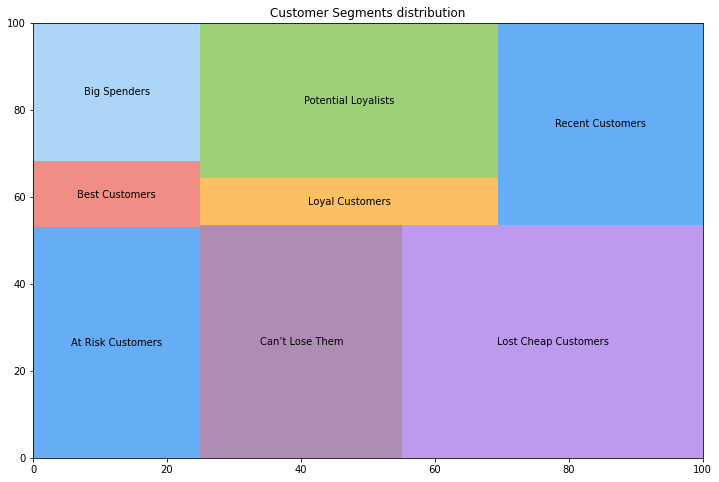

In [256]:
segment = list(rfm_segments.iloc[:8].Segment)
score = list(rfm_segments.iloc[:8].counts)
color_list = ["#248af1", "#eb5d50", "#8bc4f6", "#8c5c94", "#a170e8", "#fba521", "#75bc3f"]
fig = plt.figure(figsize=(12,8))
plt.title('Customer Segments distribution')
squarify.plot(sizes=score, label=segment,color=color_list, alpha=0.7)


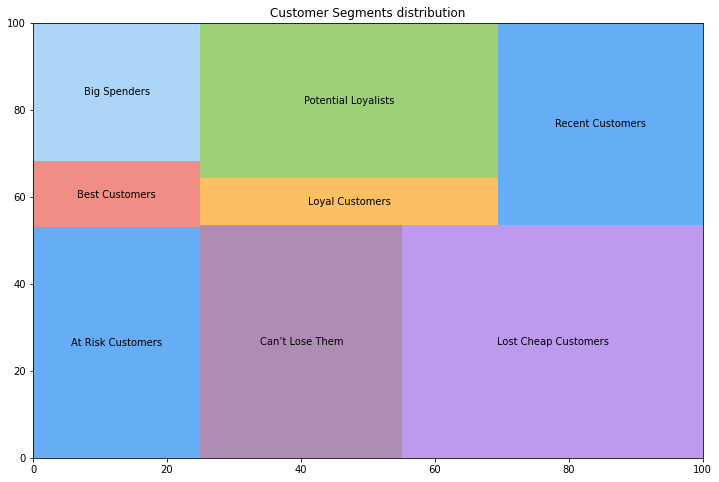

In [257]:
fig

#### RFM Analysis Report

##### Best Customers
1. We can give a reward them for their multiple purchases.
2. We can Suggest them to "Refer a friend" and can give points or rewards for both.
3. They can be the early adopters to new products



##### Lost Cheap Customers
1. We can send them personalized Emails to encourage them to order by giving some discounts.
2. We can create campaigns by sending out feedback surveys with which we can analyze the issue
3. Once we identify the problem, work to correct it. Once corrected, spin it into a marketing campaign.


##### Big Spenders
1. We can give them early access to good deals.
2. Award higher status
3. Leverage better deals


##### Loyal Customers
1. Loyalty cards can be awarded to them and later the points that were accumulated can be converted to discounts.
2. Offer Membership or Loyalty Programs
3. Recommend related products to upsell them

##### At Risk Customers
1. Use a new channel to reach out like social media targeted Ads
2. Winback campaigns can be setup